This notebook re-runs part of the experiments in the tutorial https://jmetzen.github.io/2015-11-27/vae.html

In [20]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from simple_fc import build_encoder, build_decoder
from vae import Variational_Autoencoder

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [22]:
tf.reset_default_graph()

In [23]:
sess = tf.InteractiveSession()
model = Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,z_dim = 20,img_dim = 784,dataset = 'mnist',
                              learning_rate = 0.001, num_epochs = 10)
model.train()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch 1 loss: 191.693097035
Epoch 2 loss: 142.0321827
Epoch 3 loss: 129.971875
Epoch 4 loss: 124.159687694
Epoch 5 loss: 120.309818809
Epoch 6 loss: 117.808485537
Epoch 7 loss: 116.090268777
Epoch 8 loss: 114.740775091
Epoch 9 loss: 113.638454229
Epoch 10 loss: 112.677966642


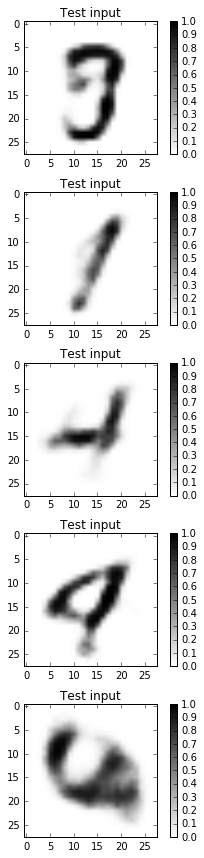

In [24]:
generated_images = model.generate(10)
plt.figure(figsize=(8, 12))
for i in range(5):
    plt.subplot(5, 2, 2*i + 1) 
    #plt.imshow(generated_images[i].reshape(28, 28), vmin=0, vmax=1) # color
    plt.imshow(generated_images[i].reshape(28, 28), cmap = 'gray_r', vmin=0, vmax=1) # grayscale
    plt.title("Test input")
    plt.colorbar()  
plt.tight_layout()

In [25]:
sess.close()
tf.reset_default_graph()

In [26]:
# Conditional VAE
sess = tf.InteractiveSession()
model = Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,z_dim = 20,img_dim = 784,dataset = 'mnist',
                              learning_rate = 0.001, num_epochs = 10, is_conditional = True)
model.train()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch 1 loss: 185.709323495
Epoch 2 loss: 134.794115836
Epoch 3 loss: 123.3863079
Epoch 4 loss: 118.674240043
Epoch 5 loss: 115.603474357
Epoch 6 loss: 113.150270067
Epoch 7 loss: 111.162932892
Epoch 8 loss: 109.567845348
Epoch 9 loss: 108.400246388
Epoch 10 loss: 107.440726665


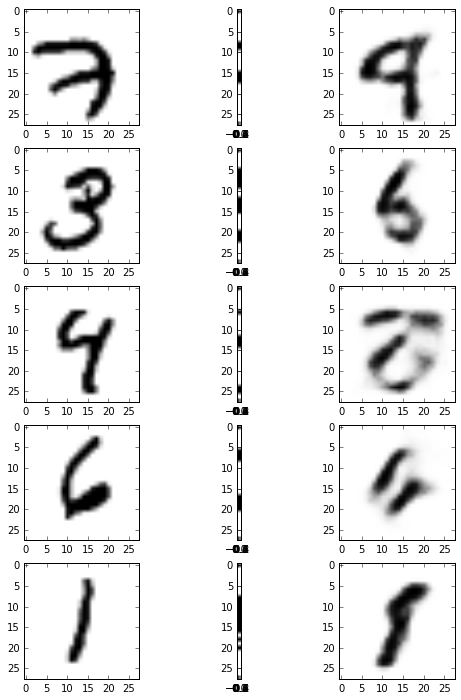

In [27]:
from misc_ops import *
images, _ = mnist.train.next_batch(100)
cols = get_middle_column(images)
generated_images = model.generate(num=100, cols=cols)

num_show = 5
plt.figure(figsize=(8,12))
for i in xrange(num_show):
    plt.subplot(num_show, 3, 3*i+1)
    plt.imshow(images[i,].reshape(28, 28), cmap='gray_r')
    plt.subplot(num_show, 3, 3*i+2)
    plt.imshow(cols[i,].reshape(28,1), cmap='gray_r')
    plt.subplot(num_show, 3, 3*i+3)
    plt.imshow(generated_images[i,].reshape(28,28), cmap='gray_r')
plt.show()